In [1]:
import numpy as np

from keras.datasets import mnist

from keras.models import Sequential, Model
from keras.layers import Flatten, Dense, Activation, Dropout
from keras.utils import to_categorical

from tqdm import tqdm_notebook

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Using TensorFlow backend.
/Users/tentenich/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train =  x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

In [5]:
model.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total para

In [7]:
model.fit(x_train, y_train, 
          batch_size=64, epochs=10,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 21s 348us/step - loss: 0.2208 - acc: 0.9331 - val_loss: 0.0991 - val_acc: 0.9690
Epoch 2/10
60000/60000 [==============================] - 23s 387us/step - loss: 0.1005 - acc: 0.9691 - val_loss: 0.0857 - val_acc: 0.9724
Epoch 3/10
60000/60000 [==============================] - 26s 438us/step - loss: 0.0752 - acc: 0.9762 - val_loss: 0.0851 - val_acc: 0.9740
Epoch 4/10
60000/60000 [==============================] - 22s 367us/step - loss: 0.0586 - acc: 0.9812 - val_loss: 0.0720 - val_acc: 0.9779
Epoch 5/10
60000/60000 [==============================] - 24s 401us/step - loss: 0.0506 - acc: 0.9837 - val_loss: 0.0691 - val_acc: 0.9798
Epoch 6/10
60000/60000 [==============================] - 40s 672us/step - loss: 0.0442 - acc: 0.9854 - val_loss: 0.0704 - val_acc: 0.9789
Epoch 7/10
60000/60000 [==============================] - 42s 692us/step - loss: 0.0395 - acc: 0.9874 - val_loss: 0.

In [8]:
model.evaluate(x_test, y_test, verbose=0)

[0.087207956858585026, 0.98019999999999996]

In [9]:
tmp_model = Model(model.inputs, model.layers[-2].output)

In [10]:
def softmax(x, t=1.0):
    x_exp = np.exp(x / t)
    return x_exp / x_exp.sum(axis=1, keepdims=True)

In [11]:
result = {}
for t in tqdm_notebook([1, 4, 16, 32, 128]):
    probs_train = softmax(tmp_model.predict(x_train), t=10)
    for k in tqdm_notebook(range(2, 8), leave=False):
        new_model = Sequential()
        new_model.add(Flatten(input_shape=(28, 28)))
        new_model.add(Dense(512 // 2 ** k, activation='relu'))
        new_model.add(Dropout(0.2))
        new_model.add(Dense(256 // 2 ** k, activation='relu'))
        new_model.add(Dropout(0.2))
        new_model.add(Dense(10))
        new_model.add(Activation('softmax'))

        new_model.compile('adam', 'kullback_leibler_divergence', metrics=['accuracy'])

        new_model.fit(x_train, probs_train, 
                      batch_size=64, epochs=10,
                      validation_data=(x_test, y_test), verbose=0)
        
        result[(t, k)] = new_model.evaluate(x_test, y_test, verbose=0)
        print(result[(t, k)])

HBox(children=(IntProgress(value=0, max=5), HTML(value='')))

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

[0.68387128229141236, 0.96879999999999999]
[0.71011628246307368, 0.95909999999999995]
[0.81585477027893072, 0.9395]
[1.0182662712097168, 0.90339999999999998]
[1.4085629436492919, 0.72160000000000002]
[1.7839486965179443, 0.50860000000000005]


HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

[0.6948214530944824, 0.97030000000000005]
[0.71795420646667485, 0.95899999999999996]
[0.80398239822387696, 0.9355]
[1.0248754589080811, 0.90190000000000003]
[1.4096997861862182, 0.7651]
[1.7868844917297364, 0.42320000000000002]


HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

[0.70832047805786136, 0.9698]
[0.73363930463790894, 0.96309999999999996]
[0.81529138298034665, 0.94020000000000004]
[1.0531558255195617, 0.89419999999999999]
[1.4180498867034912, 0.74719999999999998]
[1.8100345912933349, 0.48649999999999999]


HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

[0.69565194120407103, 0.96819999999999995]
[0.71770561304092406, 0.96060000000000001]
[0.7933579082489014, 0.94330000000000003]
[1.0373911024093627, 0.88439999999999996]
[1.4343521713256835, 0.748]
[1.8067946029663087, 0.49519999999999997]


HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

[0.67745736913681032, 0.9698]
[0.71507681541442869, 0.96109999999999995]
[0.80379360361099239, 0.94240000000000002]
[1.0067450031280518, 0.90249999999999997]
[1.5416747245788573, 0.63529999999999998]
[1.8066210189819336, 0.4093]



In [12]:
result_baseline = {}

for k in tqdm_notebook(range(2, 8), leave=False):
    new_model = Sequential()
    new_model.add(Flatten(input_shape=(28, 28)))
    new_model.add(Dense(512 // 2 ** k, activation='relu'))
    new_model.add(Dropout(0.2))
    new_model.add(Dense(256 // 2 ** k, activation='relu'))
    new_model.add(Dropout(0.2))
    new_model.add(Dense(10))
    new_model.add(Activation('softmax'))

    new_model.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])

    new_model.fit(x_train, y_train, 
                  batch_size=64, epochs=10,
                  validation_data=(x_test, y_test), verbose=0)
        
    result_baseline[k] = new_model.evaluate(x_test, y_test, verbose=0)
    print(result_baseline[k])

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

[0.075203182488493628, 0.9788]
[0.093084225583006622, 0.97140000000000004]
[0.14554217061232774, 0.95660000000000001]
[0.27607546288967133, 0.92789999999999995]
[0.82387235450744634, 0.82840000000000003]
[1.8580213680267335, 0.32219999999999999]


In [13]:
result_baseline

{2: [0.075203182488493628, 0.9788],
 3: [0.093084225583006622, 0.97140000000000004],
 4: [0.14554217061232774, 0.95660000000000001],
 5: [0.27607546288967133, 0.92789999999999995],
 6: [0.82387235450744634, 0.82840000000000003],
 7: [1.8580213680267335, 0.32219999999999999]}

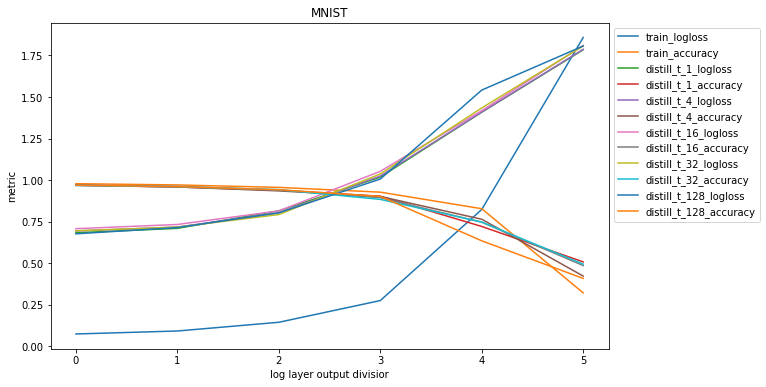

In [15]:
legend = []

plt.figure(figsize=(10, 6))
plt.title('MNIST')

    
plt.plot([result_baseline[i] for i in range(2, 8)])
legend = ['train_logloss', 'train_accuracy']

for t in [1, 4, 16, 32, 128]:
    plt.plot([result[(t, i)] for i in range(2, 8)])
  
    legend += ['distill_t_{}_logloss'.format(t), 
               'distill_t_{}_accuracy'.format(t)]
    
plt.ylabel('metric')
plt.xlabel('log layer output divisior')
plt.legend(legend, bbox_to_anchor=(1.0, 1.0))